# Introduction
The objective in this project is to build machine learning models to classify or identify fraudulent card transactions from a given card transactions data.

The dataset contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Due to confidentiality issues, the input variables are transformed into numerical using PCA transformations.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Scikit packages

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score




In [7]:
# Load data
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
Positives=df[df['Class']==1]
Negatives=df[df['Class']==0]

In [14]:
print((len(Positives)/len(df))*100,"%")

0.1727485630620034 %


It can infered that the datset is skewed with just 0.17274% fradulent examples

In [15]:
# The target variables having imbalance values
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
print('Normal transactions: ', df['Class'].value_counts().values[0])
print('fraudulent transactions: ', df['Class'].value_counts().values[1])

Normal transactions:  284315
fraudulent transactions:  492


In [19]:
df = df.drop(['Time'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Plots

[Text(0, 0, 'Non-Fraudulent'), Text(1, 0, 'Fraudulent')]

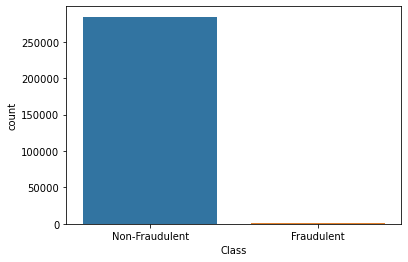

In [24]:
ax = sns.countplot(x="Class", data=df)
ax.set_xticklabels(['Non-Fraudulent','Fraudulent'])

# Data Pre-processing

### Independent and Dependent variables

In [25]:
X = df.drop('Class', axis=1)
y = df['Class']

### Standardize the data

In [26]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Splitting the data set into train and test (75:25)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 0)

In [28]:
X_train.shape

(213605, 29)

In [29]:
X_test.shape

(71202, 29)

### Applying SMOTE to oversample the minority class

As noted earlier, the dataset is unbalanced. Training unbalanced dataset with learning algorithms may lead to misclassification of minority class.

In [30]:
from imblearn.over_sampling import SMOTE

In [32]:
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_resample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(426466, 29) (426466,)
213233 213233


## Model Training

Machine learning algorithm used: Logistic Regression, RandomForest Classifier, Naives Bayes then compare there metrics to select the suitable.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

In [34]:
# logistic Regression
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_test)
y_logreg_prob=logreg.predict_proba(X_test)[:,1]

In [41]:
# Evaluate the model
v = logreg
scores = cross_val_score(v, X_sm, y_sm, cv=10)
accuracy = metrics.accuracy_score(y_sm, v.predict(X_sm))
confusion_matrix = metrics.confusion_matrix(y_sm, v.predict(X_sm))
classification = metrics.classification_report(y_sm, v.predict(X_sm))



print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
print()
print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification)
print()
 

Cross Validation Mean Score:  95.89999999999999%

Model Accuracy:  95.89999999999999%

Confusion Matrix:
 [[209395   3838]
 [ 13710 199523]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    213233
           1       0.98      0.94      0.96    213233

    accuracy                           0.96    426466
   macro avg       0.96      0.96      0.96    426466
weighted avg       0.96      0.96      0.96    426466




In [42]:
# Test the model
accuracy = metrics.accuracy_score(y_test, y_logreg)
confusion_matrix = metrics.confusion_matrix(y_test, y_logreg)
classification = metrics.classification_report(y_test, y_logreg)

print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification) 
print()

Model Accuracy:  98.2%

Confusion Matrix:
 [[69821  1261]
 [   13   107]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.08      0.89      0.14       120

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.57     71202
weighted avg       1.00      0.98      0.99     71202




In [48]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

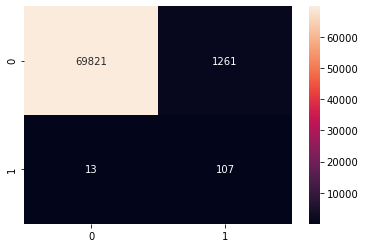

In [61]:
classdict = {'normal':0, 'fraudulent':1}
cm = confusion_matrix(y_test, y_logreg)
sns.heatmap(cm, annot=True, fmt='d',)

In [62]:
# RandomForest classifier
rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)
y_rf_prob=rf.predict_proba(X_test)[:,1]

In [66]:
# Test the model
accuracy = metrics.accuracy_score(y_test, y_rf)
confusion_matrix = metrics.confusion_matrix(y_test, y_rf)
classification = metrics.classification_report(y_test, y_rf)

print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification) 
print()

Model Accuracy:  99.9%

Confusion Matrix:
 [[71065    17]
 [   19   101]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.86      0.84      0.85       120

    accuracy                           1.00     71202
   macro avg       0.93      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202




<AxesSubplot:>

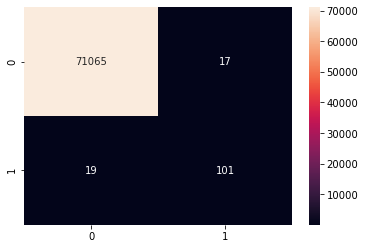

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_rf)
sns.heatmap(cm, annot=True, fmt='d')

In [71]:
# Naive Bayes
nb=BernoulliNB()
nb.fit(X_sm,y_sm)


BernoulliNB()

In [78]:
y_nb=nb.predict(X_test)
y_nb_prob=nb.predict_proba(X_test)[:,1]

In [72]:
# Evaluate the model
v = nb
scores = cross_val_score(v, X_sm, y_sm, cv=10)
accuracy = metrics.accuracy_score(y_sm, v.predict(X_sm))
confusion_matrix = metrics.confusion_matrix(y_sm, v.predict(X_sm))
classification = metrics.classification_report(y_sm, v.predict(X_sm))



print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
print()
print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification)
print()

Cross Validation Mean Score:  91.9%

Model Accuracy:  91.9%

Confusion Matrix:
 [[212054   1179]
 [ 33251 179982]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92    213233
           1       0.99      0.84      0.91    213233

    accuracy                           0.92    426466
   macro avg       0.93      0.92      0.92    426466
weighted avg       0.93      0.92      0.92    426466




In [73]:
# Test the model
y_nb=nb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_nb)
confusion_matrix = metrics.confusion_matrix(y_test, y_nb)
classification = metrics.classification_report(y_test, y_nb)

print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification) 
print()

Model Accuracy:  99.4%

Confusion Matrix:
 [[70687   395]
 [   20   100]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71082
           1       0.20      0.83      0.33       120

    accuracy                           0.99     71202
   macro avg       0.60      0.91      0.66     71202
weighted avg       1.00      0.99      1.00     71202




<AxesSubplot:>

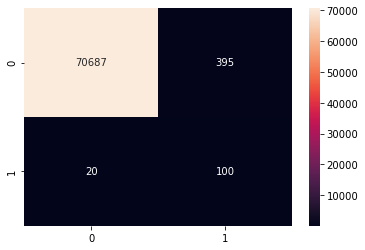

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_nb)
sns.heatmap(cm, annot=True, fmt='d')

## Plotting the ROC Curve

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [83]:
# calculate scores
logreg_auc = roc_auc_score(y_test,y_logreg_prob)
rf_auc = roc_auc_score(y_test,y_rf_prob)
nb_auc = roc_auc_score(y_test,y_nb_prob)

In [84]:
# summarize scores
print('Logistic: ROC AUC=%.3f' % (logreg_auc))
print('RandomForest: ROC AUC=%.3f' % (rf_auc))
print('Naives Bayes: ROC AUC=%.3f' % (nb_auc))

Logistic: ROC AUC=0.977
RandomForest: ROC AUC=0.982
Naives Bayes: ROC AUC=0.963


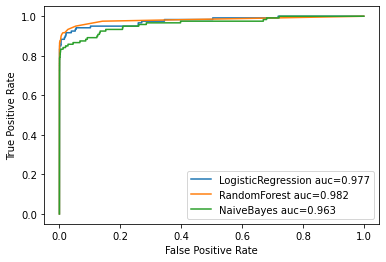

In [94]:
# calculate roc curves
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, y_logreg_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_rf_prob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_nb_prob)
# plot the roc curve for the model
plt.plot(logreg_fpr, logreg_tpr, label="LogisticRegression auc="+str('%.3f' % (logreg_auc)))
plt.plot(rf_fpr, rf_tpr, label="RandomForest auc="+str('%.3f' % (rf_auc)))
plt.plot(nb_fpr, nb_tpr, label="NaiveBayes auc="+str('%.3f' % (nb_auc)))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In conclusion, the Ramdom forest classifier is the optimal model for this credit card fraud detection using the 3 predefined modelsin our case. It can be further investigated using other classification models to improve the accuracy.